In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import ccf

from arch import arch_model

import sys
sys.path.append('../')
from utils import *

## Loess (STL)

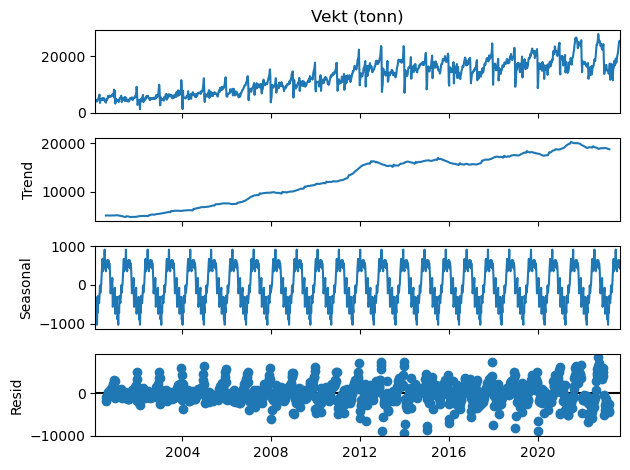

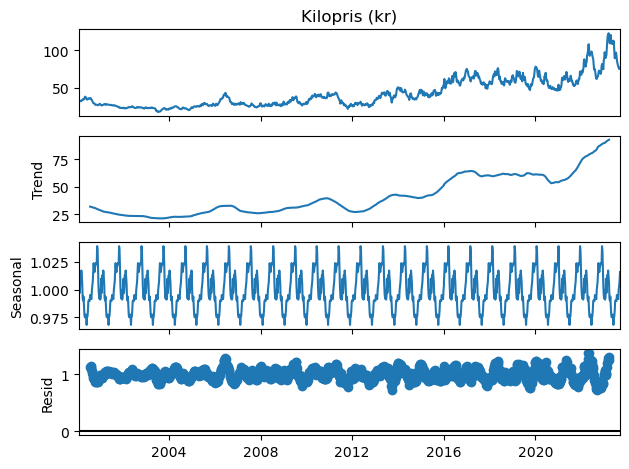

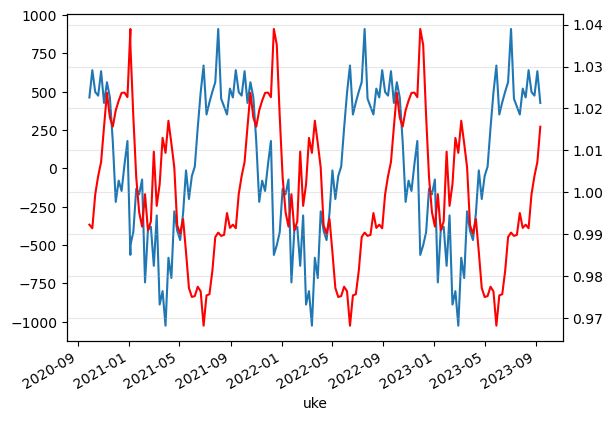

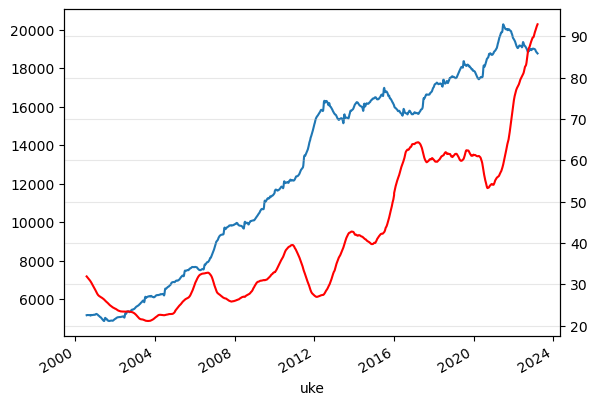

In [2]:
data_URL = 'https://www.ssb.no/statbank/sq/10085910'

data = import_salmon_data(data_URL)


STL_volume = seasonal_decompose(
    data['Vekt (tonn)'], model="additive", period=50
)

volume_plot = STL_volume.plot()

STL_price = seasonal_decompose(
    data['Kilopris (kr)'], model="multiplicative", period=50
)

price_plot = STL_price.plot()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

seasonal = pd.DataFrame({'Volume':STL_volume.seasonal, 'Price':STL_price.seasonal})

seasonal['Volume'].iloc[-52*3:].plot(ax=ax1)
seasonal['Price'].iloc[-52*3:].plot(ax=ax2, color='red')
ax2.grid(alpha=0.3)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

trend = pd.DataFrame({'Volume':STL_volume.trend, 'Price':STL_price.trend})

trend['Volume'].plot(ax=ax1)
trend['Price'].plot(ax=ax2, color='red')
ax2.grid(alpha=0.3)

cross_corr = ccf(seasonal['Price'], seasonal['Volume'])


15

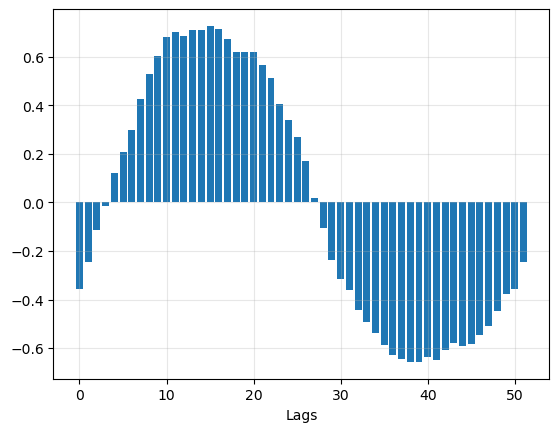

In [3]:
plt.grid(alpha=0.3)
plt.bar(range(52), cross_corr[:52])
plt.xlabel('Lags')

cross_corr[:52].argmax()